# **preprocessing**

In [1]:
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import pytesseract
from Levenshtein import distance
from fuzzywuzzy import fuzz

2024-02-06 16:40:15.614413: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 16:40:15.614561: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 16:40:15.783522: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


import necessary libraries and modules:
cv2: OpenCV library for computer vision tasks.
os: Operating system module for interacting with the file system.
numpy: Numerical computing library for handling arrays and mathematical operations.
load_img and img_to_array from Keras preprocessing module for image loading and conversion.
matplotlib.pyplot: Module for plotting and visualization.
pytesseract: Python wrapper for Google's Tesseract-OCR Engine, used for optical character recognition (OCR).
Levenshtein: A library for computing Levenshtein (edit) distance between sequences.
fuzz: Module for fuzzy string matching.

In [ ]:
data_path='/kaggle/input/iam-handwritten-forms-dataset/data'
written_text=[]
counter=0
directories = os.listdir(data_path)
for folder in directories:
    folder_path=os.path.join(data_path, folder)
    for img_name in os.listdir(folder_path):
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        written_text_img = gray_image[600:2500]
        plt.imshow(written_text_img)
        _, threshold_img = cv2.threshold(written_text_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        written_text.append(pytesseract.image_to_string(threshold_img))
        counter+=1
        print(counter)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148


Assigns the path to the directory containing handwritten form images to the variable data_path.
Initializes an empty list written_text to store the extracted text from images.
Initializes a counter variable counter to keep track of the number of processed images.

Lists all directories within the specified data_path and iterates through them.
Joins the directory path with each directory name to get the full path to the directory.
Iterates through the images within each directory.
Joins the image path with the directory path and image name to get the full path to the image.
Reads the image using OpenCV's imread() function and stores it in the variable img.

Converts the color image to grayscale using cv2.cvtColor() function.
Selects a region of interest (ROI) from the grayscale image, presumably containing the handwritten text.
Displays the selected region using plt.imshow().

Applies Otsu's thresholding to binarize the selected region.
Extracts text from the binarized image using pytesseract.image_to_string() and appends it to the written_text list.
Increments the counter variable to keep track of the processed images.
Prints the value of counter.

In [17]:
os.makedirs("/kaggle/working/written text", exist_ok=True)

In [25]:
output_file_path=os.path.join('/kaggle/working/written text','written text.txt')
# Write each text to the output file with empty lines between each text
with open(output_file_path, 'w', encoding='utf-8') as f:
    for text in written_text:
        text.replace('\x0c','')
        f.write(text)

Creates a directory named "written text" in the working directory.
Defines the output file path by joining the directory path with the file name "written text.txt".

Opens the output file in write mode with UTF-8 encoding.
Iterates through each extracted text in the written_text list.
Removes any '\x0c' characters from the text.
Writes each text to the output file.

# **Functions Calaulate WER and CER**

In [ ]:
# calculate Character Error Rate
def cer(ground_truth, text):
    return distance(ground_truth, text) / max(len(ground_truth), len(text))

#calculate Word Error Rate
def wer(ground_truth, text):
    ground_truth_words = ground_truth.split()
    text_words = text.split()
    return distance(ground_truth_words, text_words) / max(len(ground_truth_words), len(text_words))


This line defines a function named cer that takes two arguments: ground_truth and text.
ground_truth represents the true or correct text.
text represents the recognized or extracted text.

Calculates the Levenshtein distance (edit distance) between ground_truth and text using the distance() function from the Levenshtein library.
The Levenshtein distance is the minimum number of single-character edits (insertions, deletions, or substitutions) required to change one word into the other.
Divides the distance by the maximum length of ground_truth and text.
Returns the normalized distance, which is the Character Error Rate (CER). CER measures the rate of character-level errors in the recognized text compared to the ground truth.

This line defines a function named wer that also takes two arguments: ground_truth and text.
ground_truth and text have the same meanings as in the cer function.

Splits both ground_truth and text into lists of words using the split() method.
This allows comparing word by word instead of character by character.

Calculates the Levenshtein distance between the lists of words ground_truth_words and text_words.
Divides the distance by the maximum length of ground_truth_words and text_words.
Returns the normalized distance, which is the Word Error Rate (WER). WER measures the rate of word-level errors in the recognized text compared to the ground truth.

# **Test Example**

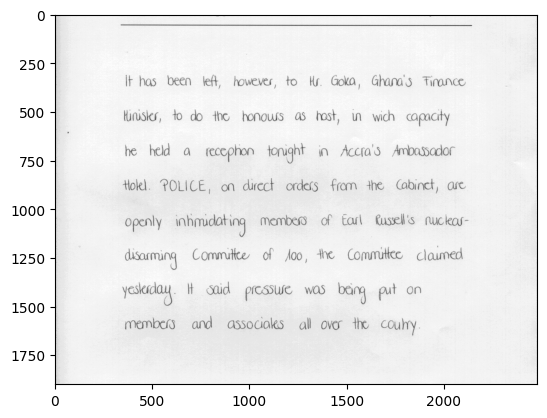

In [26]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
# Load the image
image_path = '/kaggle/input/iam-handwritten-forms-dataset/data/029/a02-053.png'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Split the image into printed_text_img and written_text_img
printed_text_img = image[:600]
written_text_img = image[600:2500]
written_text_img_gray = cv2.cvtColor(written_text_img, cv2.COLOR_BGR2GRAY)
_, threshold_img = cv2.threshold(written_text_img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(threshold_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours_img = cv2.drawContours(np.zeros(threshold_img.shape, dtype='uint8'), contours, -1, (1), -1)
plt.imshow(written_text_img)

In [29]:
images=[]
images.append(written_text_img)
images.append(written_text_img_gray)
images.append(threshold_img)
images.append(contours_img)

# **Visualize image in each phase**

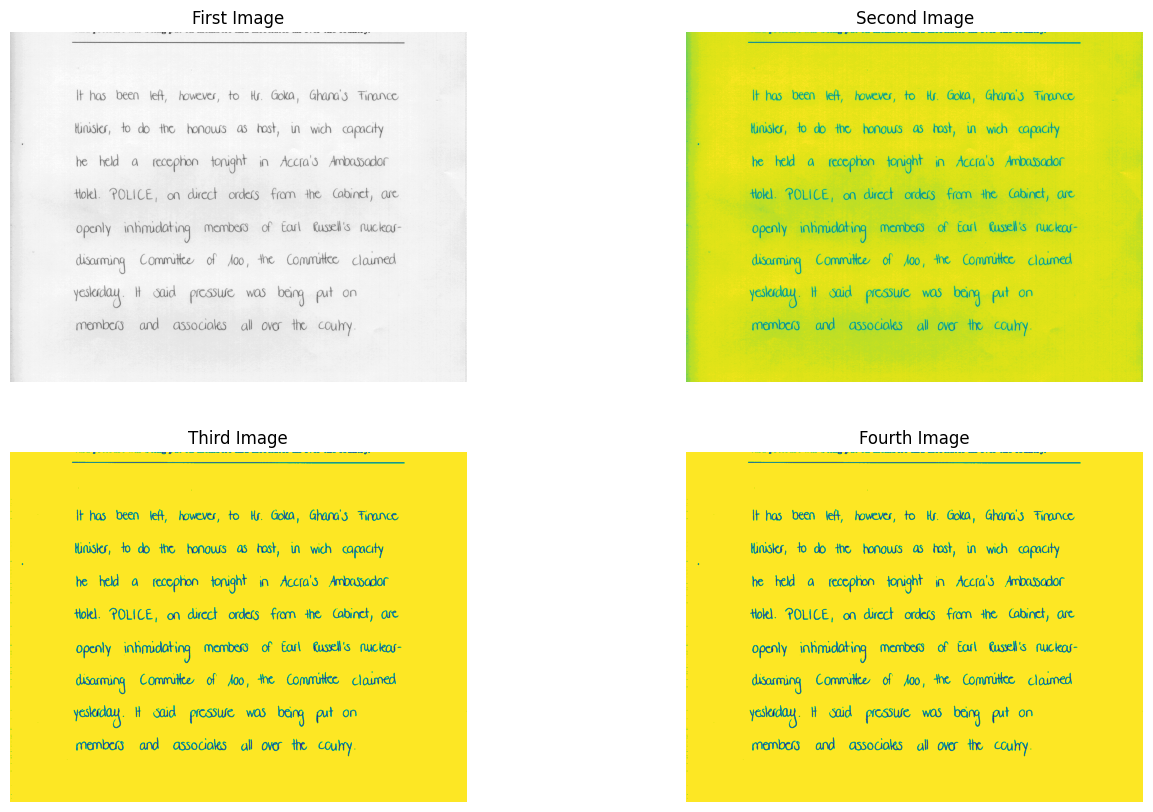

In [30]:
fig = plt.figure(figsize=(16,10))
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(images[0])
plt.axis('off')
plt.title("First Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(images[1])
plt.axis('off')
plt.title("Second Image")

fig.add_subplot(rows, columns, 3)
plt.imshow(images[2])
plt.axis('off')
plt.title("Third Image")

fig.add_subplot(rows, columns, 4)
plt.imshow(images[3])
plt.axis('off')
plt.title("Fourth Image");

# **Real Text in image**

In [35]:
ground_truth="It has been left, however, to Mr. Goka, Ghana's Finance Minister, to do the honours as host, in which capacity he held a reception tonight in Accra's Ambassador Hotel.POLICE, on direct orders from the Cabinet, are openly intimidating members of EarlRussell's nuclear-disarming Committee of 100, the Committee claimed yesterday. Itsaid pressure was being put on members and associates all over the country."

In [34]:
tesseract_preds = []
for img in images:
    tesseract_preds.append(pytesseract.image_to_string(img))

# **Image 1**

Text: a a ee:

If has been lef, however, to He. Goka, Ghana's Finance
lurusies, to do tho honouss as best, in wich capacity
he held a recephon torught in Accfa's Ambassador
Holl. POLICE, on direct orders from the Cabinet, are
openly inhmudating membess of torl Qussell's mucleays-
csarmung Commute of joo, tne Committee claumed
yesterday H odd pmcsswe was bang put on

members and assouaks all over the Coury.

CER: 0.20246913580246914
WER: 0.4782608695652174
Similarity Ratio: 83


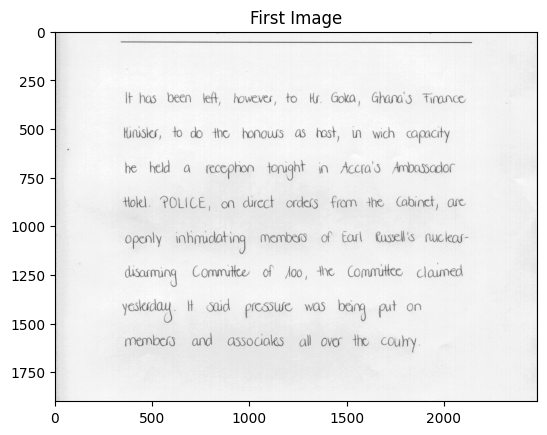

In [36]:
print(f'Text: {tesseract_preds[0]}')
print("CER:", cer(ground_truth, tesseract_preds[0]))
print("WER:", wer(ground_truth, tesseract_preds[0]))
print("Similarity Ratio:", fuzz.ratio(ground_truth, tesseract_preds[0]))
plt.imshow(images[0])
plt.title("First Image");

# **Image 2**

Text: a a ee:

If has been lef, however, to He. Goka, Ghana's Finance
lurusies, to do tho honouss as best, in wich capacity
he held a recephon torught in Accfa's Ambassador
Holl. POLICE, on direct orders from the Cabinet, are
openly inhmudating membess of torl Qussell's mucleays-
csarmung Commute of joo, tne Committee claumed
yesterday H odd pmcsswe was bang put on

members and assouaks all over the Coury.

CER: 0.20246913580246914
WER: 0.4782608695652174
Similarity Ratio: 83


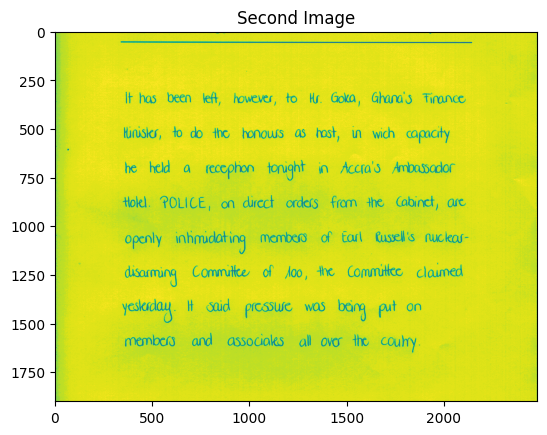

In [37]:
print(f'Text: {tesseract_preds[1]}')
print("CER:", cer(ground_truth, tesseract_preds[1]))
print("WER:", wer(ground_truth, tesseract_preds[1]))
print("Similarity Ratio:", fuzz.ratio(ground_truth, tesseract_preds[1]))
plt.imshow(images[1])
plt.title("Second Image");

# **Image 3**

Text: a

Ik has been lef, however, to He. Goka, Ghana's Finance
urusis, to do tho honouss as bast, in wich capacity
he held a recephon torught in Accfa's Ambassador
Holl. POLICE, on direct orders from dhe Cabinet, are
openly inhmudating members of ftorl Qussell's nucteas-
ausarmung Commute of Joo, tne Committee clauned
yesterday H Said prcssWe was bang put on

membes and assouaks all over the Coulry.

CER: 0.19012345679012346
WER: 0.47761194029850745
Similarity Ratio: 84


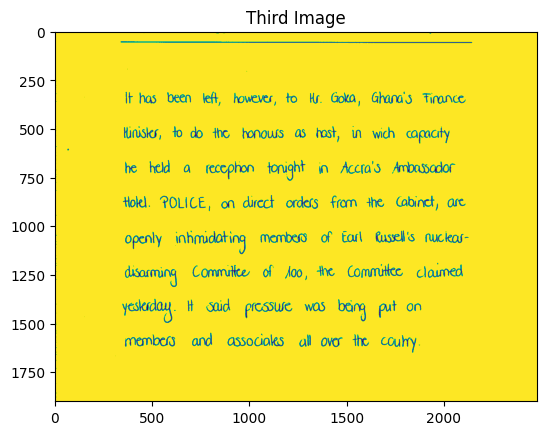

In [38]:
print(f'Text: {tesseract_preds[2]}')
print("CER:", cer(ground_truth, tesseract_preds[2]))
print("WER:", wer(ground_truth, tesseract_preds[2]))
print("Similarity Ratio:", fuzz.ratio(ground_truth, tesseract_preds[2]))
plt.imshow(images[2])
plt.title("Third Image");

# **Image 4**

Text: re

Ir has been le however to Hr Golo) Ghinas Tinonce
WMSKE, 40 06 inc honowS OS fost, in wich copacity
he held a fecephon tonight an ACcia.s Ambasacor
moll. POLICE, on direct ordelS from tne Gobincr, ore
Openly innmuaaring members oF Gor tusscls ficleos
Gisarenin} Commrutiee, of Joo, ane Commulice Cloumed
pea: Ht Odie prcssue was bam put On

members and asscuoks all ove the COURT.

CER: 0.3506172839506173
WER: 0.7164179104477612
Similarity Ratio: 70


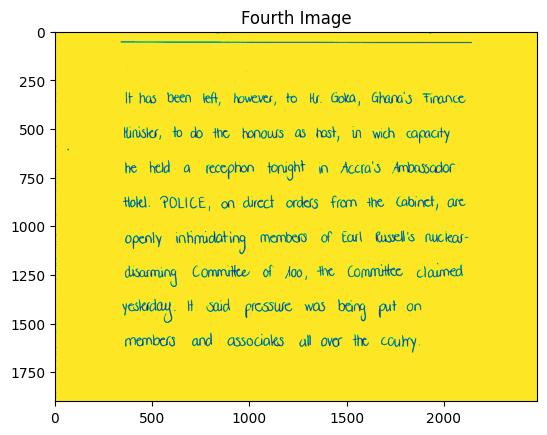

In [39]:
print(f'Text: {tesseract_preds[3]}')
print("CER:", cer(ground_truth, tesseract_preds[3]))
print("WER:", wer(ground_truth, tesseract_preds[3]))
print("Similarity Ratio:", fuzz.ratio(ground_truth, tesseract_preds[3]))
plt.imshow(images[3])
plt.title("Fourth Image");